# Diffraction from an amorphous and crystaline grating

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft, ifft, fftshift


%matplotlib inline
#%matplotlib notebook

In [2]:
nn=100000 #resolution of x
x_max=4
x = np.linspace(-x_max,x_max,nn);
degrees = np.pi/180; #conversion constant

In [3]:
A = 0.3; #Amphorphous reflectivity
B = 0.7;#Crystaline refelctiveity

P = 4/(2*np.pi); #Period of diffraction grating
D =P/2; #Width of Crystaline section

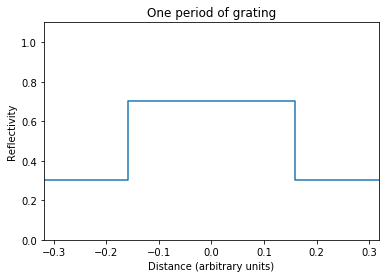

In [4]:
#Draw one period of the grating (illustration perposes only)
d = {'col1': [-P/2, -D/2,-D/2,D/2,D/2,P/2], 'col2': [A, A,B,B,A,A]};
grating_y= pd.DataFrame(data=d);
plt.plot(grating_y['col1'],grating_y['col2']);
plt.ylim(0,1.1);
plt.xlim(-P/2,P/2);

plt.ylabel('Reflectivity');
plt.xlabel('Distance (arbitrary units)');
plt.title('One period of grating');

In [19]:
PHASE = 0*degrees
N=100 #number of illuminated diffraction grating periods

In [16]:
# Intenisty distribution function
def Intensity(A,B,P,D,PHASE,x):
    A1 = A*2*np.cos((P+D)/4*x);
    A2 = np.sinc((P-D)/2*x);
    B1 = B*np.sinc(D/2*x)*np.exp(1j*PHASE);
    C1 =  np.sin((N+1)*x*P/2) /np.sin(x*P/2)   * np.exp(-1j*x*P*(1+N/2));
    D= (A1*A2 +B1)*C1;

    return np.real_if_close(np.conjugate(D)*D); #intensity of pattern

In [17]:
I=Intensity(A,B,P,D,PHASE,x);

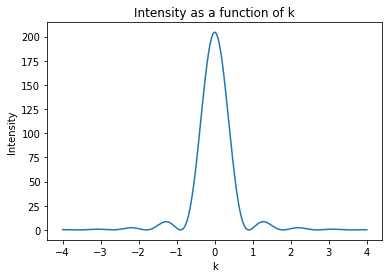

In [18]:
#plot intensity distribution
plt.figure();
plt.plot(x,I);
#plt.xlim(-0.5,0.5);
plt.xlabel('k');
plt.ylabel('Intensity');
plt.title('Intensity as a function of k');

This is a plot of the mod squared of:
$\DeclareMathOperator{\sinc}{sinc}$
$${\Big(2A\cos\frac{(P+D)k}{4}\sinc\frac{(P-D)}{2k} + B\sinc\frac{Dk}{2} e^{i\phi} \Big) \frac{ \sin \frac{(N+1)kp}{2}}{\sin\frac{xp}{2}} e^{-ixp(1+\frac{N}{2})}} $$ 


# What happens to the maxima if with change the phase contribution from crystaline GTe

$I$ has a simple dependance on $\phi$:
$$ I = G^{2} (H^{2}+J^{2} +\cos \phi)$$

In [9]:
#What happens to the maxima if we change the PHASE
def frange(start,stop,step):
    i = start
    while i < stop:
        yield i
        i += step
I_list = []
for i in frange(0, 360*degrees, 1*degrees):
    I=Intensity(A,B,P,D,i,x)
    I_max= I[int(nn/2)]
    I_list.append(I_max)

Text(0.5,1,'$I(k=0)$ Intensity of first peak as a function of $\\phi$')

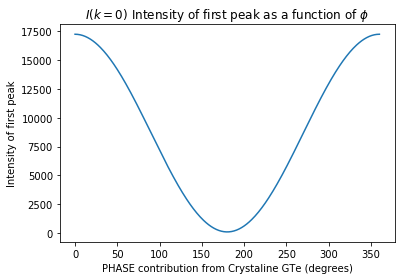

In [10]:
plt.plot(I_list);
plt.xlabel('PHASE contribution from Crystaline GTe (degrees)');
plt.ylabel('Intensity of first peak');
plt.title(r'$I(k=0)$ Intensity of first peak as a function of $\phi$')

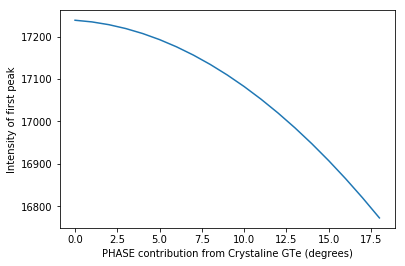

In [11]:
plt.plot(I_list[1:20]);
plt.xlabel('PHASE contribution from Crystaline GTe (degrees)');
plt.ylabel('Intensity of first peak');
plt.ylim();

If this is correct that the experiment is unlikely to work

# Flattened Gaussian Diffraction Grating with phase contributions
 I model the reflectivity of the sample as a series of flattened gaussians:
 $$y = exp^{-x^{6}}$$
 $$\textrm{Amplitude of Reflectivity} =y *(B-A)+A$$
 $$\textrm{Phase profile} = iy\phi $$
 ### $$\textrm{Reflectivity Amplitude and phase profile} \propto e^{-x^{6}}e^{-iy\phi}$$

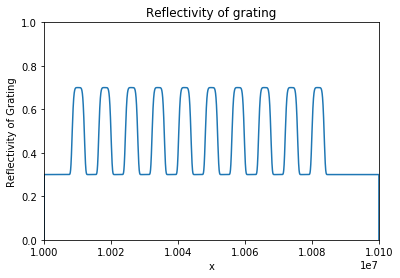

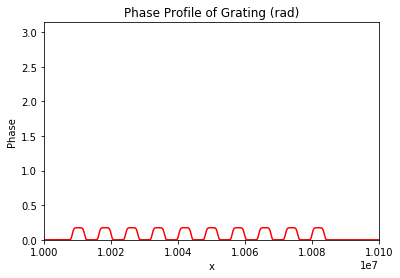

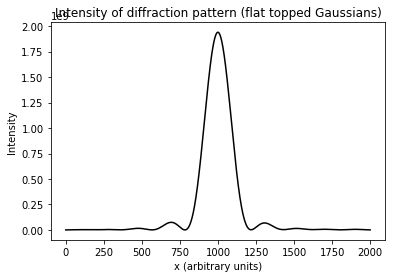

In [21]:
#create flattened gaussian reflection profile with PHASE contribution.
y=np.array([0]*nn)
n_rows=10
PHASE=10*degrees

a_guassian = D/np.sqrt((np.log(2)))

    
for ii in range(-int(n_rows/2),int(n_rows/2)):
    y_temp = np.exp(-((x-ii*P)/a_guassian*2.5)**6)   
    y=y+y_temp

    
Reflectance = (y*(B-A)+A ) * np.exp(1j*y*PHASE) 

n_zeros = 10000000
Reflectance = np.concatenate([Reflectance, np.zeros(n_zeros)])
Reflectance = np.concatenate([np.zeros(n_zeros),Reflectance])

#plot this function:

plt.plot(np.abs(Reflectance))
plt.xlabel('x');
plt.ylabel('Reflectivity of Grating');
plt.title('Reflectivity of grating');
plt.ylim(0,1);
plt.xlim(n_zeros,n_zeros+nn);
plt.show()

plt.plot(np.angle(Reflectance),'r')
plt.xlabel('x');
plt.ylabel('Phase');
plt.title('Phase Profile of Grating (rad)');
plt.ylim(0,np.pi);
plt.xlim(n_zeros,n_zeros+nn);
plt.show()

FT_Reflectance = fftshift(fft(Reflectance));

#Ploting
#plt.plot(np.abs(FT_Reflectance**2),'k');

plt.plot(np.abs(FT_Reflectance[int((nn+2*n_zeros)/2-1000):int((nn+2*n_zeros)/2+1000)]**2),'k');
plt.xlabel('x (arbitrary units)');
plt.ylabel('Intensity');
plt.title('Intensity of diffraction pattern (flat topped Gaussians)');
plt.show()

In [ ]:
Meeting with Jacopo

laser safe
moniker in the lab
interferometer
Foruier transfrom
thesis: page 47